# **Final Project**

## Objective

Lorem ipsum dolor sit amet

## Datasets

[Customer Segmentation Credit Card](https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m) - **23 Columns 10k Rows** - **✓**

## 00. Import Libraries

In [96]:
#import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as ss
from scipy.stats import chi2_contingency

from feature_engine.outliers import Winsorizer

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

## 01. Data Loading

In [50]:
#read csv file
bank_df = pd.read_csv('./datasets/BankChurners.csv')

print(f'Dataset Columns: {bank_df.shape[1]}')
print(f'Dataset Rows: {bank_df.shape[0]}')

Dataset Columns: 23
Dataset Rows: 10127


In [51]:
#check head
bank_df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [52]:
#check info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [53]:
#drop unused columns
bank_df.drop(columns=["CLIENTNUM", 
                      "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                      "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], inplace=True)

In [54]:
#check null value
bank_df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [55]:
#check duplicate data
bank_df.duplicated().sum()

0

## 02. EDA

In [56]:
#check basic statistics
bank_df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [57]:
#separate numeric and category column
num_col = bank_df.select_dtypes(include=np.number).columns.tolist()
cat_col = bank_df.select_dtypes(include=object).columns.tolist()

print(f'Numeric Column : {num_col}')
print(f'Category Column : {cat_col}')

Numeric Column : ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
Category Column : ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [58]:
#set plot style
sns.set(style="whitegrid")
palette=["teal", "darkblue"]

#define hist plot function
def hist_plot(column, loc, row, axs):
    ax = sns.histplot(data=bank_df, x=column, ax=axs[loc,row], kde=True, bins=50, palette=palette, hue="Attrition_Flag")
    ax.set_title(column, fontsize=15)
    ax.set(xlabel=None)

#define count plot function
def count_plot(column, loc, row, axs):
    if column != "Attrition_Flag":
        ax = sns.countplot(data=bank_df, x=column, ax=axs[loc,row], palette=palette, hue="Attrition_Flag", alpha=0.7)
    else:
        ax = sns.countplot(data=bank_df, x=column, ax=axs[loc,row], palette=palette, alpha=0.7)
        
    ax.tick_params(axis="x", rotation=15)
    ax.set_title(column, fontsize=15)
    ax.set(xlabel=None)
    
#define boxplot
def box_plot(column, loc, row, axs):
    ax = sns.boxplot(data=bank_df, x=column, ax=axs[loc,row], palette=palette, hue="Attrition_Flag", fliersize=3, boxprops=dict(alpha=.7))
    ax.set_title(column, fontsize=15)
    ax.set(xlabel=None)

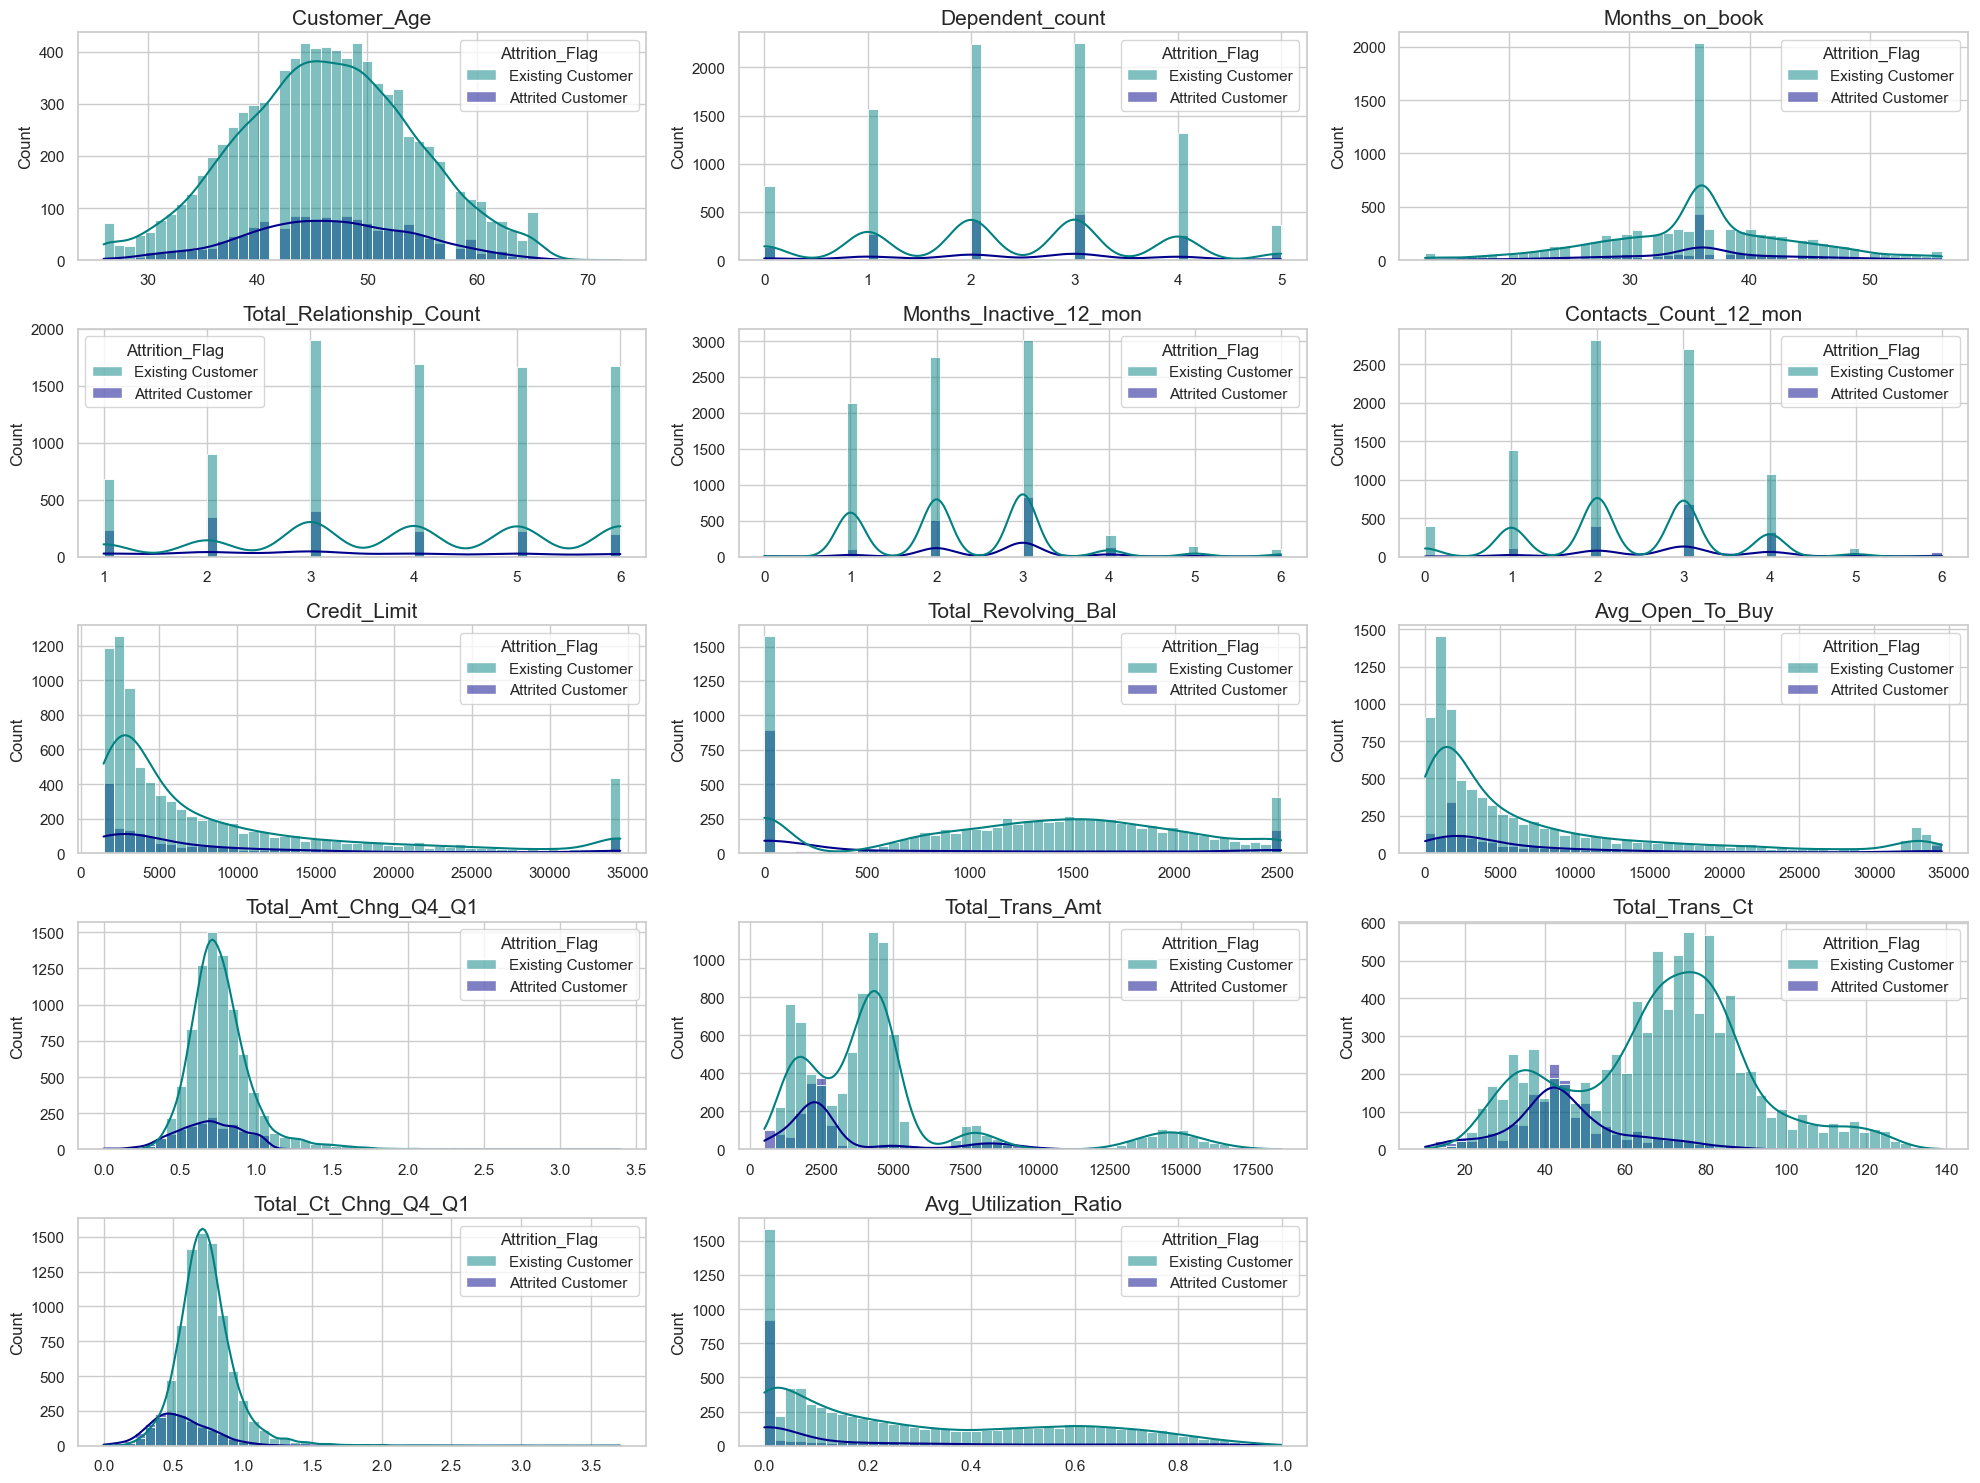

In [59]:
#loop num_col
fig, axs = plt.subplots(5,3, figsize=(20,15))
for i,x in enumerate(num_col):
    if i < 3:
        hist_plot(x, 0, i, axs)
    elif i < 6:
        hist_plot(x, 1, i-3, axs)
    elif i < 9:
        hist_plot(x, 2, i-6, axs)
    elif i < 12:
        hist_plot(x, 3, i-9, axs)
    elif i < 15:
        hist_plot(x, 4, i-12, axs)
        
axs[4,2].set_axis_off()
fig.tight_layout()

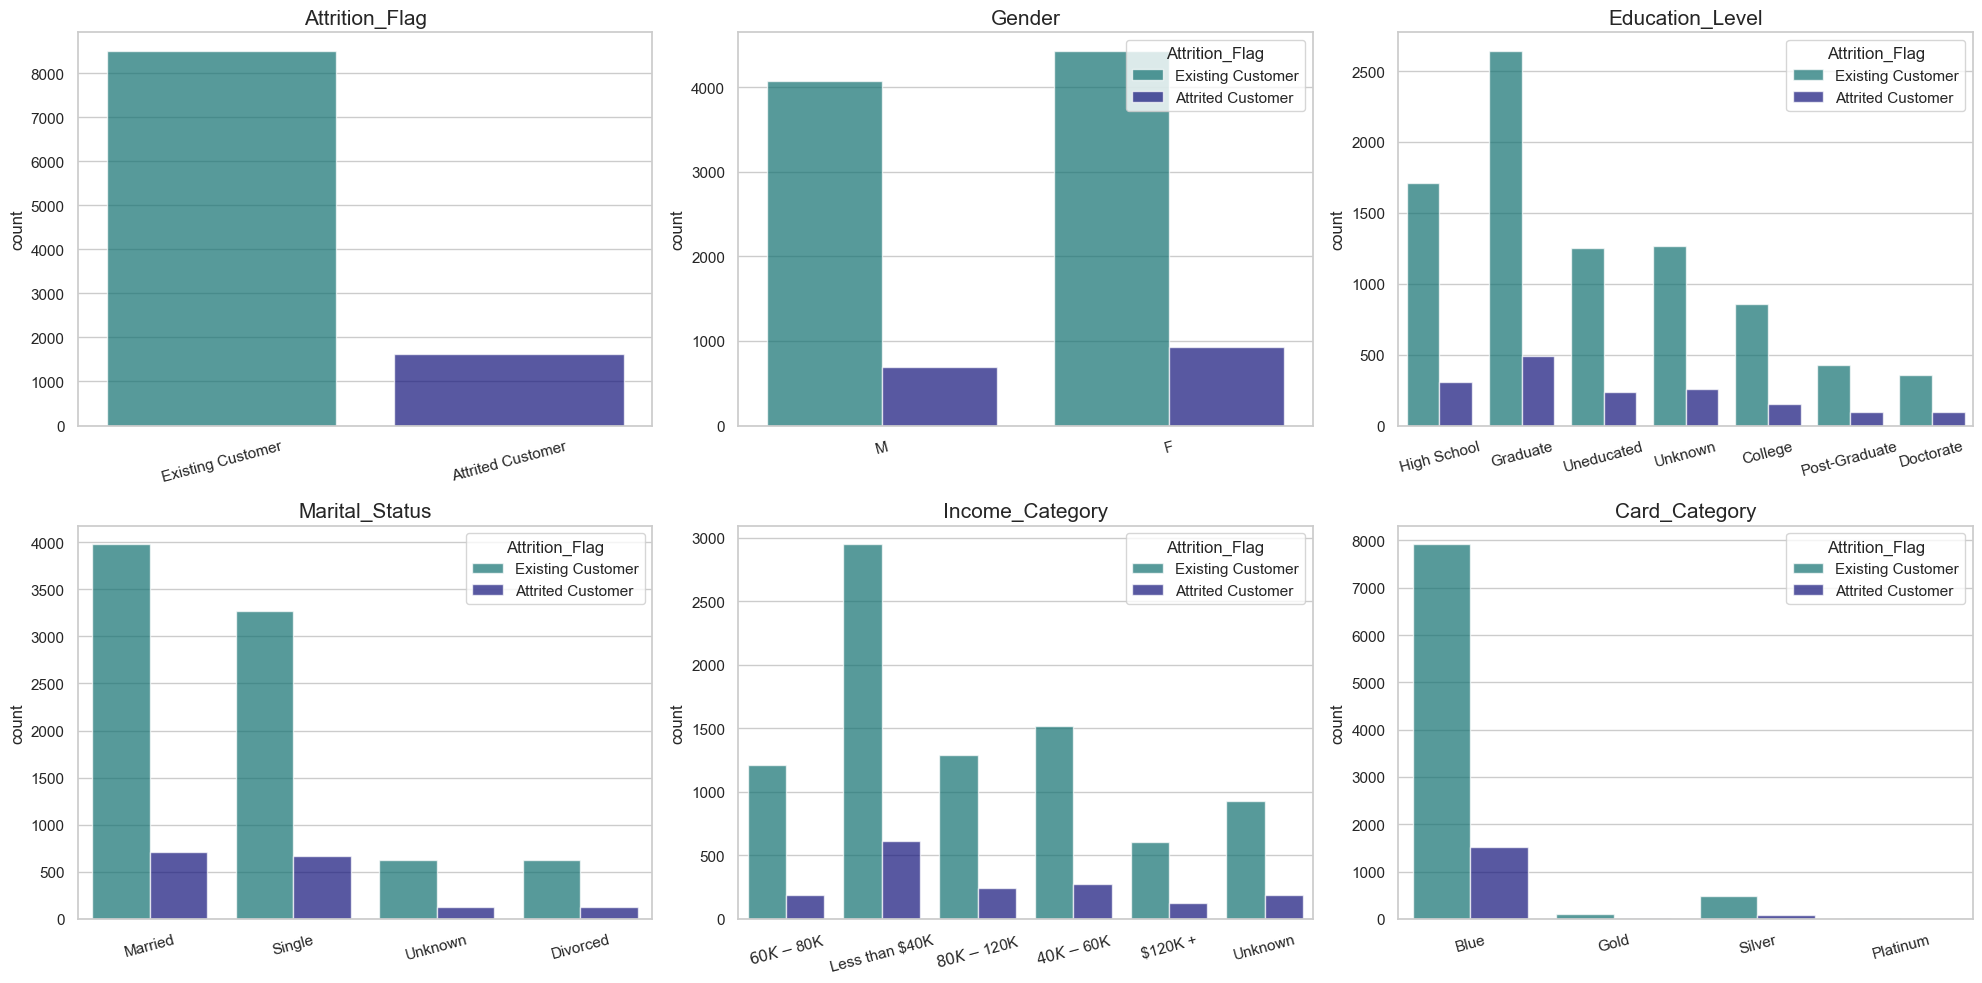

In [60]:
#loop categorical column
fig, axs = plt.subplots(2,3, figsize=(20,10))
for i,x in enumerate(cat_col):
    if i < 3:
        count_plot(x, 0, i, axs)
    elif i < 6:
        count_plot(x, 1, i-3, axs)

fig.tight_layout()


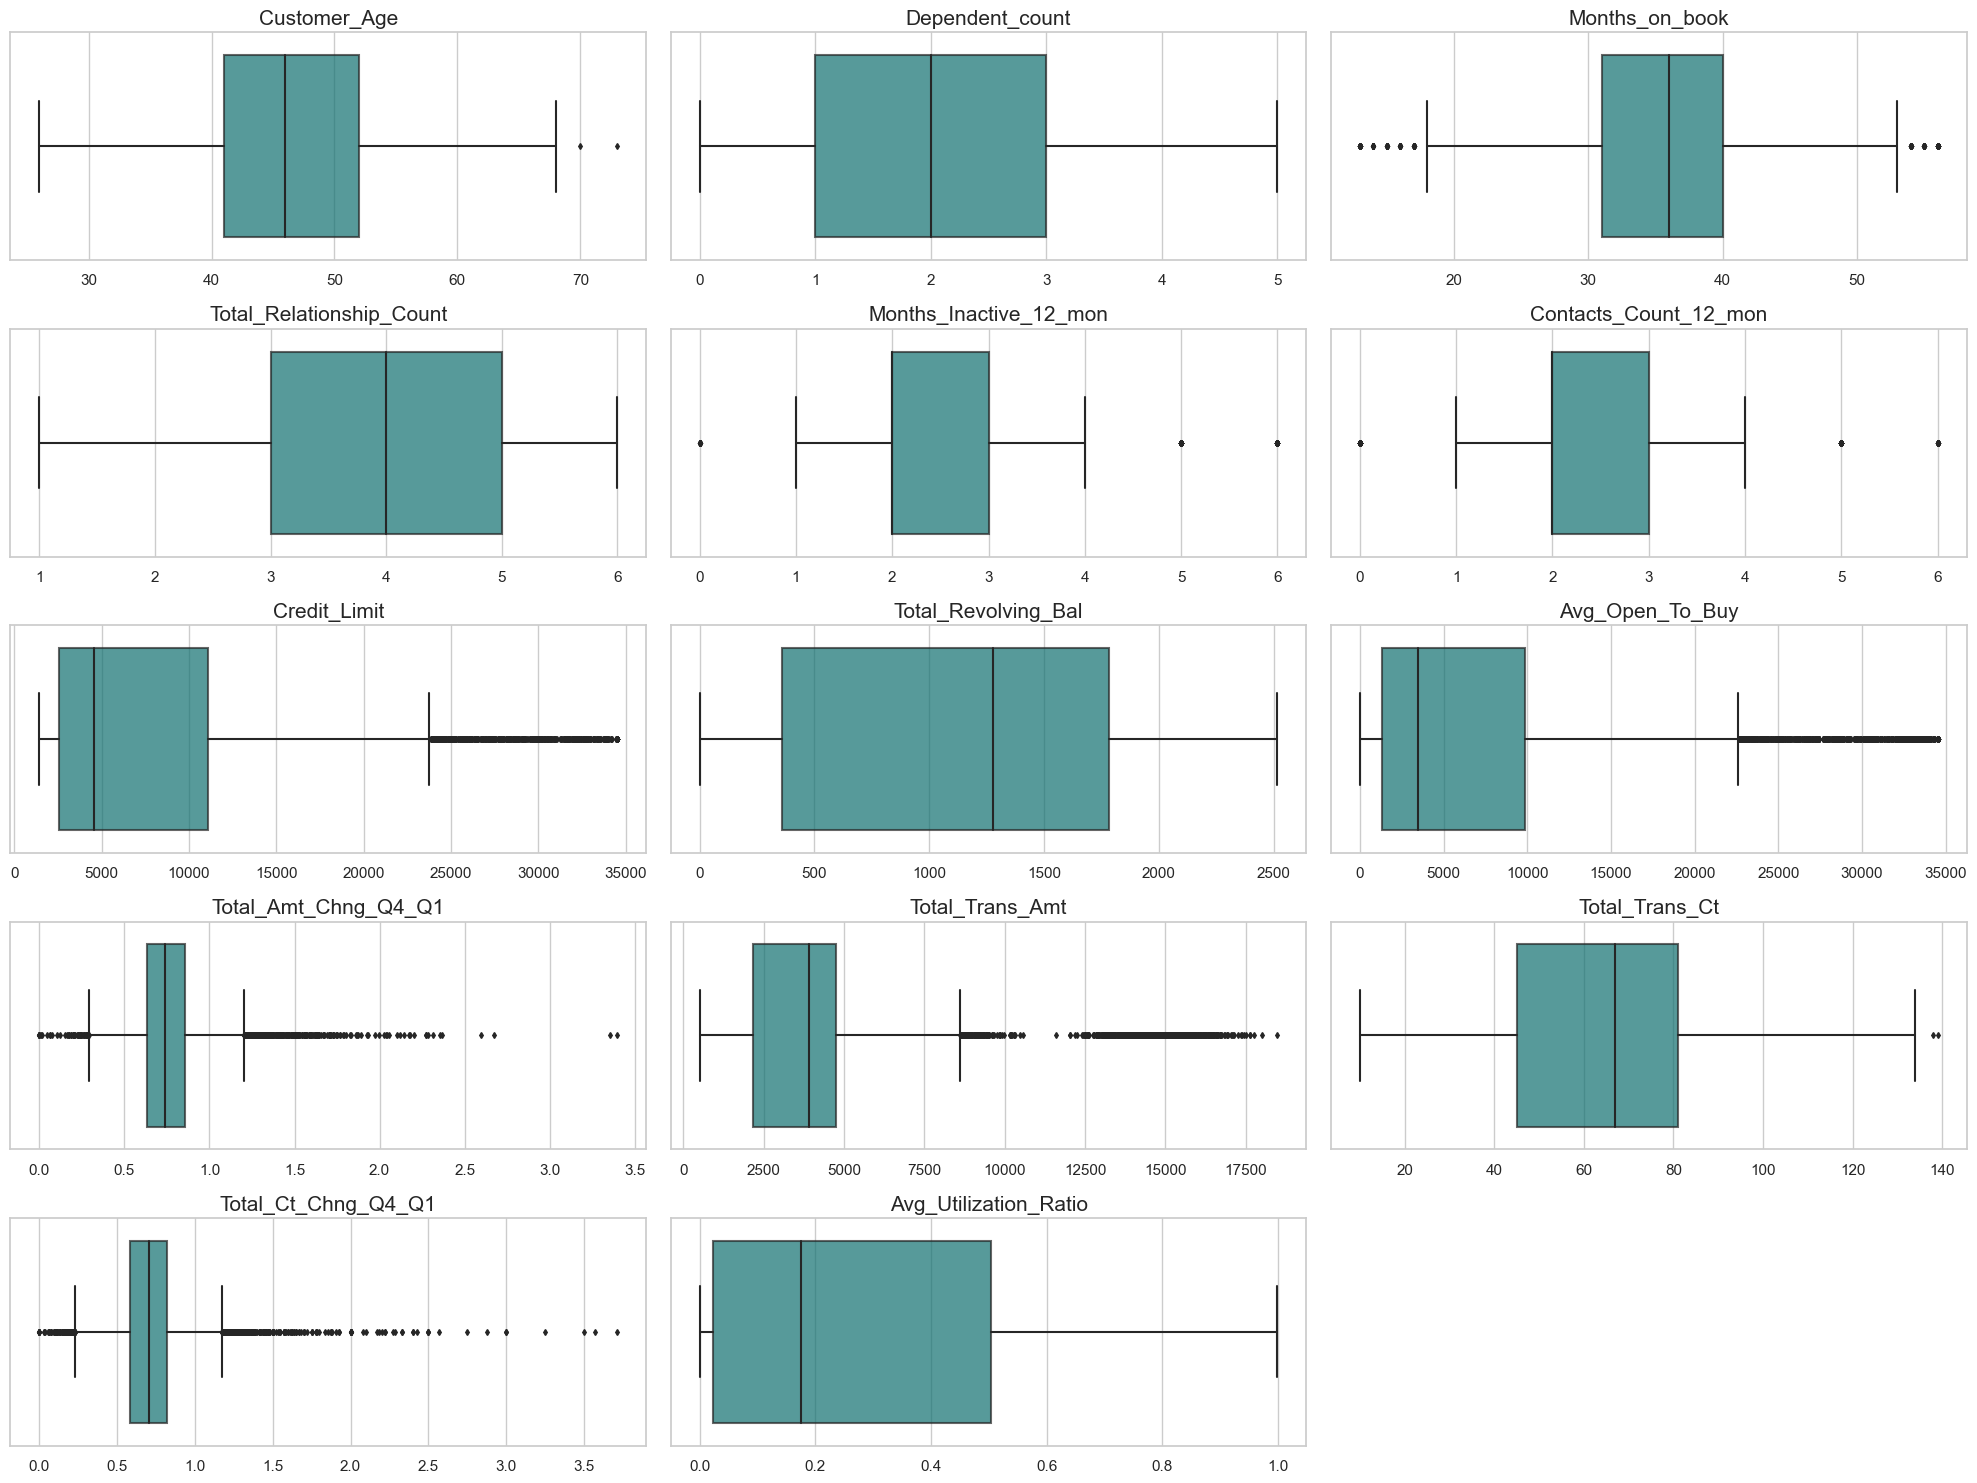

In [61]:
#loop boxplot
fig, axs = plt.subplots(5,3, figsize=(20,15))
for i,x in enumerate(num_col):
    if i < 3:
        box_plot(x, 0, i, axs)
    elif i < 6:
        box_plot(x, 1, i-3, axs)
    elif i < 9:
        box_plot(x, 2, i-6, axs)
    elif i < 12:
        box_plot(x, 3, i-9, axs)
    elif i < 15:
        box_plot(x, 4, i-12, axs)
        
axs[4,2].set_axis_off()
fig.tight_layout()

<Axes: xlabel='Months_Inactive_12_mon', ylabel='count'>

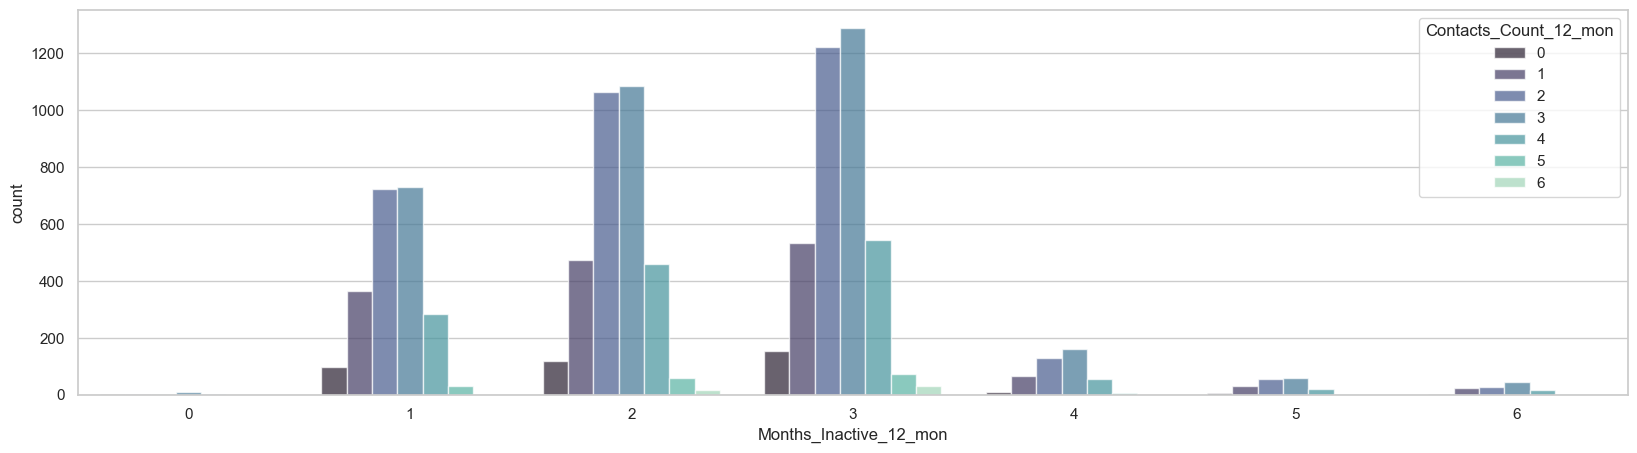

In [62]:
plt.figure(figsize=(20,5))
sns.countplot(x='Months_Inactive_12_mon',data=bank_df,palette='mako',hue='Contacts_Count_12_mon', alpha=0.7)

In [63]:
#correlation for numerical
corr_df = bank_df[num_col]

attrition = []

for i in bank_df['Attrition_Flag']:
    if i == "Existing Customer":
        attrition.append(0)
    else:
        attrition.append(1)
        
corr_df["Attrition_Flag"] = attrition
correlation=corr_df.corr()

#correlation for 
def cor_cat(columns):
    confusion_matrix = pd.crosstab(bank_df[columns], bank_df['Attrition_Flag'])
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    min_dim = min(confusion_matrix.shape) - 1
    cramers_v = np.sqrt(chi2 / (bank_df.shape[0] * min_dim))
    print(f'{columns} Corellation : {round(cramers_v,3)}')

Gender Corellation : 0.037
Education_Level Corellation : 0.035
Marital_Status Corellation : 0.024
Income_Category Corellation : 0.036
Card_Category Corellation : 0.015


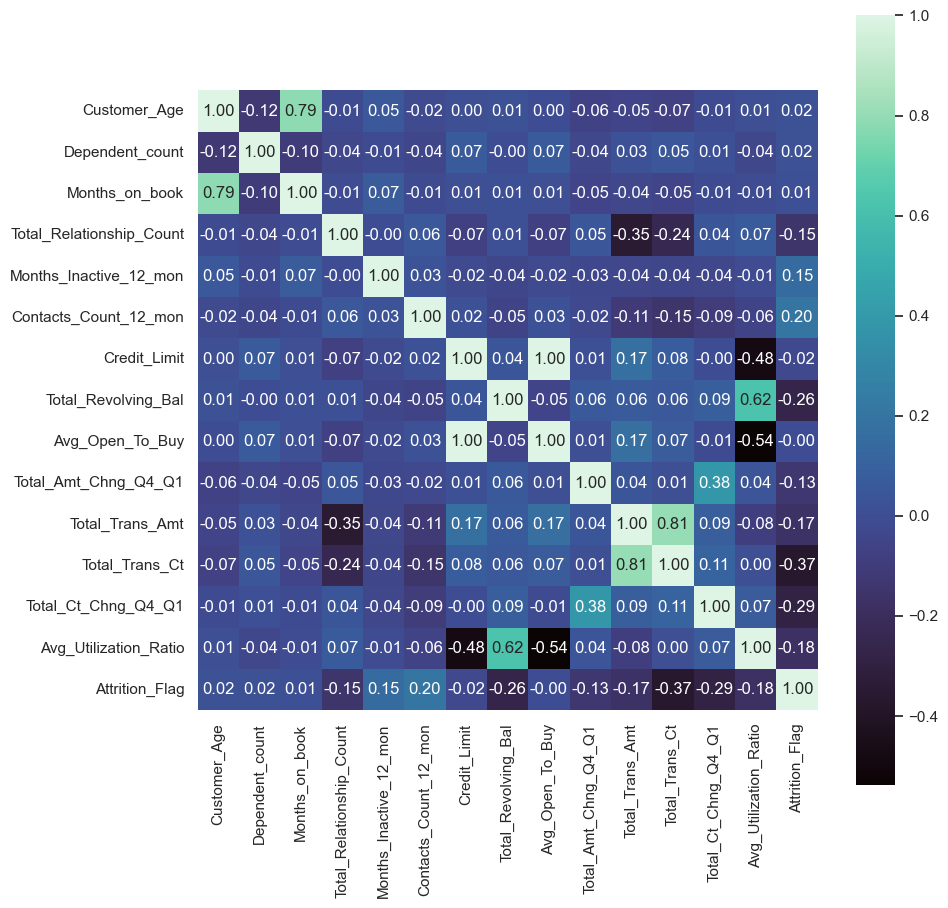

In [64]:
#check correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,vmin=None,
    cmap="mako",
    annot=True,
    fmt='.2f',
    cbar=True,
    square=True)

for i in cat_col:
    if i != "Attrition_Flag":
        cor_cat(i)

<10% is lacking correlation

## 03. Feature Engineering

### Split Target and Features

In [65]:
X = bank_df.drop(columns="Attrition_Flag")
y = bank_df["Attrition_Flag"]

X.shape, y.shape

((10127, 19), (10127,))

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=5)

X_train.shape, y_train.shape

((7088, 19), (7088,))

### Pipeline

In [67]:
bank_df['Card_Category'].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [68]:
#define variable used in pipeline
outliers=['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 
 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']
num_col = bank_df.select_dtypes(include=np.number).columns.tolist()
onehot_col = ["Gender", "Marital_Status"]
ordinal_col = ["Education_Level", "Income_Category", "Card_Category"]

In [69]:
#define ordinal ranking
education = ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post_Graduate', 'Doctorate']
income = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +']
card = ['Blue', 'Silver', 'Gold', 'Platinum']


#### Capping Outliers - Winsorizer

In [70]:
#create the capper
winsorizer_pipeline = Pipeline(
    [
        (
            "winsorizer",
            Winsorizer(
                capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                tail='both', # cap left, right or both tails 
                fold=1.5,
                variables=outliers)
         )
        ]
    )

#### Encoding - Onehot and Ordinal

In [71]:
#ordinal encoder
ordinal_pipeline = Pipeline(
    [
        (
            "ordinal_encoder",
            OrdinalEncoder(
                categories=[education,income,card],
                handle_unknown="use_encoded_value",
                unknown_value=-1,
            ),
        )  # encode using ordinal encoder
    ]
)

In [72]:
#onehot encoder
onehot_pipeline = Pipeline(
    [
        (
            "onehot_encoder",
            OneHotEncoder(handle_unknown="ignore"),
        )  # encode using onehot encoder
    ]
)

In [73]:
#label encoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y = label_encoder.transform(y)

y_train

array([1, 0, 1, ..., 1, 1, 1])

#### Scaling

In [74]:
#robust scaler
robust_pipeline = Pipeline(
    [
        (
            "robust_scaler",
            RobustScaler()
        )
    ]
)

#### Pipeline - Column Transformer

In [75]:
#make columntransformer
col_transformers = ColumnTransformer(
    [
        ("pipe_winsor", winsorizer_pipeline, outliers),
        ("pipe_ord", ordinal_pipeline, ordinal_col),
        ("pipe_onehot", onehot_pipeline, onehot_col),
        ("pipe_scaler", robust_pipeline, num_col),
    ]
)

## 04. Modeling

### Support Vector Machine Classifier

In [76]:
#define model
svc = SVC()

svc_pipeline = Pipeline([
    ("column_transformer", col_transformers),
    ("svc", svc)
])

In [77]:
#train model
svc_pipeline.fit(X_train,y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('pipe_winsor',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Credit_Limit',
                                                                                         'Avg_Open_To_Buy',
                                                                                         'Total_Amt_Chng_Q4_Q1',
                                                                                         'Total_Trans_Amt',
                                                                                         'Total_Trans_Ct',
                                                                                         'Total_Ct_Chng_Q4_Q1']))]),
                                                  ['Credit_Limit',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_...
                                                  Pipeline(steps=[('robust_scaler',
                                                                   RobustScaler())]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio'])])),
                ('svc', SVC())])

In [91]:
#train evaluation
svc_train_score = cross_val_score(svc_pipeline, X, y, cv=5, scoring="precision")

print("Cross-validation scores:", svc_train_score)
print("Mean CV score:", svc_train_score.mean())

Cross-validation scores: [0.87112561 0.83909181 0.83950617 0.83950617 0.83950617]
Mean CV score: 0.8457471873558667


### Decision Tree Classifier

In [79]:
#define Model
decision_tree = DecisionTreeClassifier()

dt_pipeline = Pipeline([
    ("column_transformer", col_transformers),
    ("decision_tree", decision_tree)
])

In [80]:
#train model
dt_pipeline.fit(X_train,y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('pipe_winsor',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Credit_Limit',
                                                                                         'Avg_Open_To_Buy',
                                                                                         'Total_Amt_Chng_Q4_Q1',
                                                                                         'Total_Trans_Amt',
                                                                                         'Total_Trans_Ct',
                                                                                         'Total_Ct_Chng_Q4_Q1']))]),
                                                  ['Credit_Limit',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_...
                                                                   RobustScaler())]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio'])])),
                ('decision_tree', DecisionTreeClassifier())])

In [90]:
#train evaluation
dt_train_score = cross_val_score(dt_pipeline, X, y, cv=5, scoring="precision")

print("Cross-validation scores:", dt_train_score)
print("Mean CV score:", dt_train_score.mean())

Cross-validation scores: [0.92703046 0.96888889 0.9579977  0.96253602 0.85699746]
Mean CV score: 0.9346901045542403


### Random Forest Classifier

In [82]:
#define Model
rf = RandomForestClassifier()

rf_pipeline = Pipeline([
    ("column_transformer", col_transformers),
    ("random_forest", rf)
])

In [83]:
#train model
rf_pipeline.fit(X_train,y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('pipe_winsor',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Credit_Limit',
                                                                                         'Avg_Open_To_Buy',
                                                                                         'Total_Amt_Chng_Q4_Q1',
                                                                                         'Total_Trans_Amt',
                                                                                         'Total_Trans_Ct',
                                                                                         'Total_Ct_Chng_Q4_Q1']))]),
                                                  ['Credit_Limit',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_...
                                                                   RobustScaler())]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio'])])),
                ('random_forest', RandomForestClassifier())])

In [89]:
#train evaluation
rf_train_score = cross_val_score(rf_pipeline, X, y, cv=5, scoring="precision")

print("Cross-validation scores:", rf_train_score)
print("Mean CV score:", rf_train_score.mean())

Cross-validation scores: [0.94011976 0.98429003 0.9679817  0.97247706 0.84596211]
Mean CV score: 0.9421661344800978


### XGBoost Classifier

In [85]:
#define Model
xgb = XGBClassifier()

xgb_pipeline = Pipeline([
    ("column_transformer", col_transformers),
    ("xgboost", xgb)
])

In [86]:
#train model
xgb_pipeline.fit(X_train,y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('pipe_winsor',
                                                  Pipeline(steps=[('winsorizer',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Credit_Limit',
                                                                                         'Avg_Open_To_Buy',
                                                                                         'Total_Amt_Chng_Q4_Q1',
                                                                                         'Total_Trans_Amt',
                                                                                         'Total_Trans_Ct',
                                                                                         'Total_Ct_Chng_Q4_Q1']))]),
                                                  ['Credit_Limit',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [93]:
#train evaluation
xgb_train_score = cross_val_score(xgb_pipeline, X, y, cv=5, scoring="precision")

print("Cross-validation scores:", xgb_train_score)
print("Mean CV score:", xgb_train_score.mean())

Cross-validation scores: [0.91326245 0.98487598 0.9773913  0.97750865 0.84765235]
Mean CV score: 0.9401381473231121


### Model Test Evaluation

In [95]:
#predict
svc_test_pred = svc_pipeline.predict(X_test)
dt_test_pred = dt_pipeline.predict(X_test)
rf_test_pred = rf_pipeline.predict(X_test)
xgb_test_pred = xgb_pipeline.predict(X_test)

In [115]:
#classification report
svc_report = classification_report(y_true=y_test, y_pred=svc_test_pred)
dt_report = classification_report(y_true=y_test, y_pred=dt_test_pred)
rf_report = classification_report(y_true=y_test, y_pred=rf_test_pred)
xgb_report = classification_report(y_true=y_test, y_pred=xgb_test_pred)

report = {'SVC': svc_report, 
          'DT' : dt_report, 
          'RF' : rf_report, 
          'XGB' : xgb_report}

In [127]:
for i in report:
    print('='*25 + ' '+ i + ' ' + '='*25)
    print(report[i])
    print("\n")

========================= SVC =========================
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       506
           1       0.83      1.00      0.91      2533

    accuracy                           0.83      3039
   macro avg       0.42      0.50      0.45      3039
weighted avg       0.69      0.83      0.76      3039



========================= DT =========================
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       506
           1       0.96      0.97      0.96      2533

    accuracy                           0.94      3039
   macro avg       0.89      0.87      0.88      3039
weighted avg       0.93      0.94      0.94      3039



========================= RF =========================
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       506
           1       0.97      0.98      0.98      2533

    accuracy